# Aprendizado não supervisionado

In [1]:
#https://github.com/ahirtonlopes/Unsupervised_Learning/blob/main/Demo1_Unsupervised_Learning.ipynb

In [2]:
import numpy as np
import pandas as pd

data_dir = "https://raw.githubusercontent.com/ahirtonlopes/Unsupervised_Learning/main/"
df_penguins = pd.read_csv(data_dir + "penguins.csv")
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

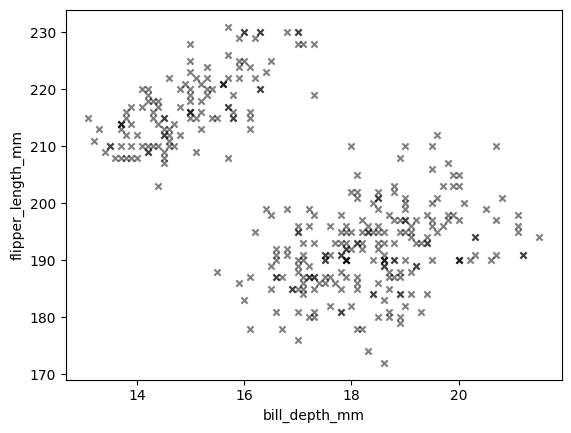

In [3]:
X_train = df_penguins[["bill_depth_mm", "flipper_length_mm"]].dropna()
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c="black", marker="x", alpha=.5)

In [4]:
X_train_scaled = (X_train - X_train.mean()) / X_train.std()

,bill_depth_mm,flipper_length_mm
r,0.176641,-1.060696
b,0.480471,0.006030
y,-1.696972,1.072757


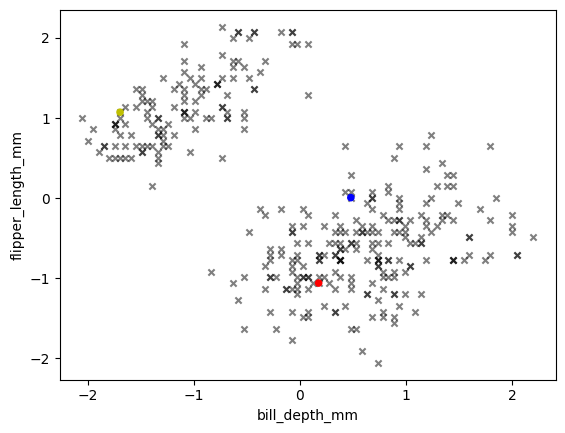

In [5]:
# Inicializando 3 centróides aleatoriamente a partir dos dados.
centroids = X_train_scaled.sample(3)

# Chamando os três clusters de "vermelho", "azul" e "amarelo" por conveniência.
centroids.index = ["r", "b", "y"]

# Plotando esses centróides.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c="black", marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

centroids

In [6]:
# Encontra o centróide mais próximo de uma determinada observação.
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

get_nearest_centroid(X_train_scaled.loc[0])

'r'

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

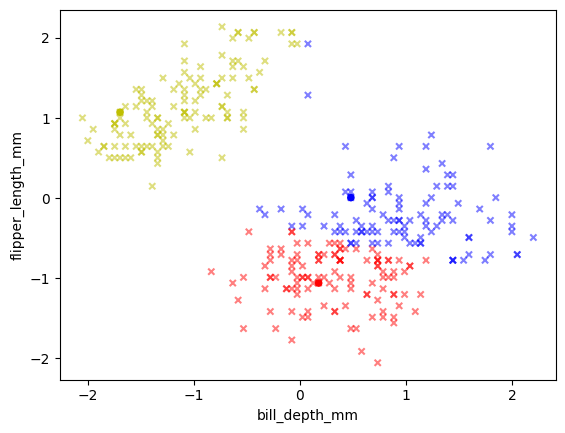

In [7]:
# Aplicando a função a todo o conjunto de dados.
clusters = X_train_scaled.apply(get_nearest_centroid, axis=1)

# Plotando as atribuições do cluster.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

,bill_depth_mm,flipper_length_mm
b,0.965221,-0.194197
r,0.303666,-1.009469
y,-1.117772,1.149749


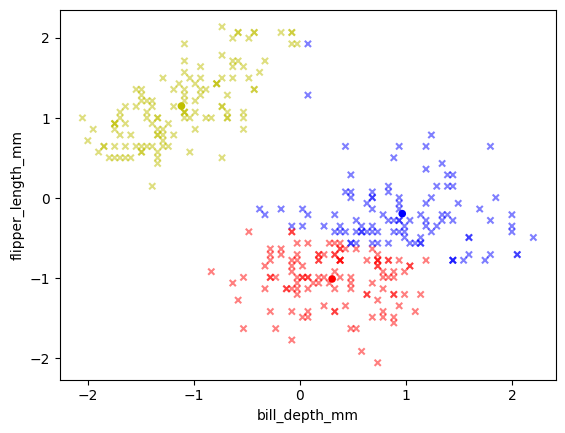

In [8]:
# Calculando o tamanho médio de cada cluster.
centroids = X_train_scaled.groupby(clusters).mean()

# Vamos plotar os centróides!
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

centroids

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

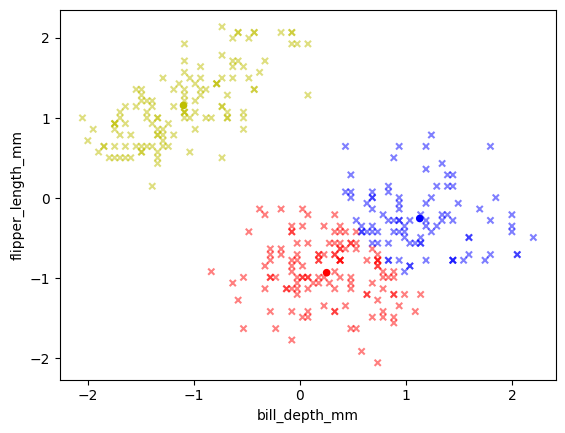

In [27]:
# Atribua pontos ao centróide mais próximo.
clusters = X_train_scaled.apply(get_nearest_centroid, axis=1)

# Recalculando os centróides com base nos clusters.
centroids = X_train_scaled.groupby(clusters).mean()

# Traçando as atribuições atuais do cluster e centróides.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

### Kmens com sklearn

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, n_init=10)
pipeline = make_pipeline(
    StandardScaler(),
    model
)

pipeline.fit(X_train)

c:\Users\marci\OneDrive\Desktop\FIAP\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\marci\OneDrive\Desktop\FIAP\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, n_init=10))])

In [29]:
# Extraindo os centróides e os clusters.
centroids = model.cluster_centers_
clusters = model.labels_

clusters

array([0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

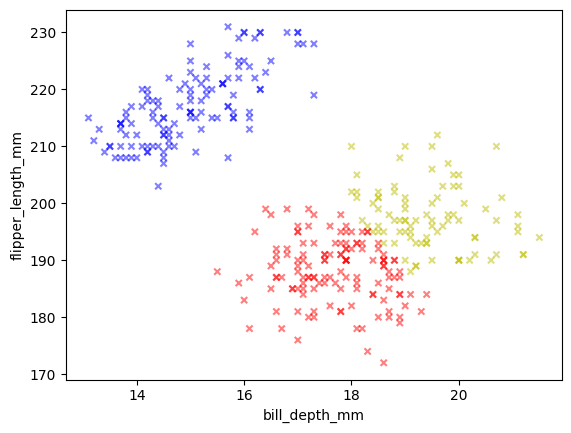

In [30]:
# Mapeando os números dos clusters para cores.
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "y"
})

# Plotando os dados
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, marker="x", alpha=.5)

In [31]:
pipeline.predict([[15, 210]])

c:\Users\marci\OneDrive\Desktop\FIAP\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])